In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

df = pd.read_excel('../data/avis/general_df_clean_sent_15k_manual_code.xlsx', sheet_name = "dicho", index_col = 0)


In [15]:
def pyramid_ratios(df):
    count_good_efficacy = df.c_good_efficacy[df.c_good_efficacy == 1].count()
    count_bad_efficacy = df.c_bad_efficacy[df.c_bad_efficacy == 1].count()
    count_good_com = df.c_good_comm[df.c_good_comm ==1].count()
    count_bad_com = df.c_bad_comm[df.c_bad_comm == 1].count()
    count_good_value = df.c_good_value[df.c_good_value == 1].count()
    count_bad_value = df.c_bad_value[df.c_bad_value == 1].count()

    ratio_efficacy = round(count_good_efficacy/(count_good_efficacy+count_bad_efficacy),2)
    ratio_com = round(count_good_com/(count_good_com+count_bad_com),2)
    ratio_value = round(count_good_value/(count_good_value+count_bad_value),2)
    return ratio_com,ratio_efficacy,ratio_value

In [38]:
# building the 3 axes

df.columns

Index(['etoiles', 'n_avis', 'date_avis', 'total_text', 'codes agrégés',
       'c_good_value', 'c_bad_value', 'c_good_efficacy', 'c_bad_efficacy',
       'c_good_comm', 'c_bad_comm'],
      dtype='object')

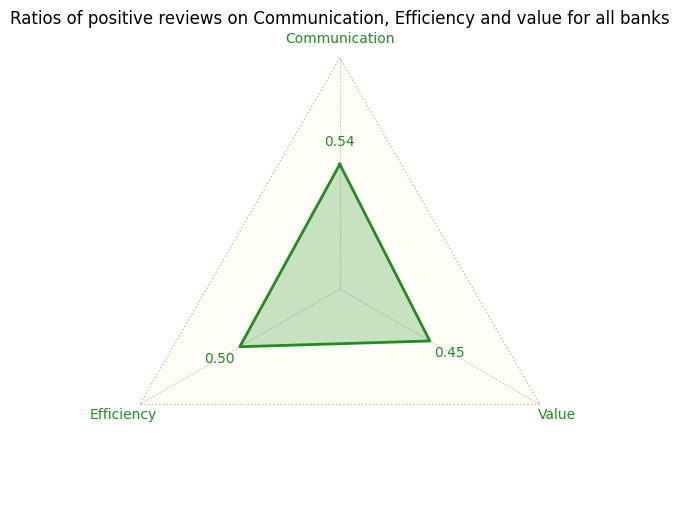

In [48]:
def pyramid_ratios(df):
    count_good_efficacy = df.c_good_efficacy[df.c_good_efficacy == 1].count()
    count_bad_efficacy = df.c_bad_efficacy[df.c_bad_efficacy == 1].count()
    count_good_com = df.c_good_comm[df.c_good_comm ==1].count()
    count_bad_com = df.c_bad_comm[df.c_bad_comm == 1].count()
    count_good_value = df.c_good_value[df.c_good_value == 1].count()
    count_bad_value = df.c_bad_value[df.c_bad_value == 1].count()

    ratio_efficacy = round(count_good_efficacy/(count_good_efficacy+count_bad_efficacy),2)
    ratio_com = round(count_good_com/(count_good_com+count_bad_com),2)
    ratio_value = round(count_good_value/(count_good_value+count_bad_value),2)
    return ratio_com,ratio_efficacy,ratio_value

ratio_com,ratio_efficacy,ratio_value = pyramid_ratios(df)

def pyramid(bank, label="all banks"):
    if bank != "alls banks":
        data = df#[df.Page == bank]
    else :
        data = df
    ratio_com,ratio_efficacy,ratio_value = pyramid_ratios(data)
    data_color = "ForestGreen"
    # Define the number of variables and their ratings
    num_vars = 3
    ratings = [ratio_com, ratio_efficacy, ratio_value]  

    # Compute angle for each axis
    angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Rotation to level the triangle
    angles = [angle + pi / 2 for angle in angles]

    # Ratings need to be repeated at the end to close the plot
    ratings = np.concatenate((ratings, [ratings[0]]))

    # Perfect ratings for reference
    perfect_ratings = np.array([1, 1, 1, 1])

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_facecolor('white')

    # Draw one axe per variable and add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(['Communication', 'Efficiency', 'Value'], fontsize=10, color=data_color)

    # Draw ylabels
    plt.yticks([], [], color="black", size=8)
    plt.ylim(0, 1)

    # perfect triangle plot
    ax.plot(angles, perfect_ratings, linewidth=1, linestyle=':', color='grey', alpha=0.5)
    ax.fill(angles, perfect_ratings, color='Ivory', alpha=0.5)  # Background color #f0fcf4

    # data plot
    ax.plot(angles, ratings, linewidth=2, linestyle='solid', color=data_color)
    ax.fill(angles, ratings, data_color, alpha=0.25)

    # Remove the polar grid lines for a cleaner look
    ax.spines['polar'].set_visible(False)
    ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)

    # adding values at triangle tips
    for angle, rating in zip(angles[:-1], ratings[:-1]):
        ax.text(angle, rating + 0.10, f'{rating:.2f}', ha='center', va='center', fontsize=10, color=data_color)
    plt.title(f"Ratios of positive reviews on Communication, Efficiency and value for {label}")
    plt.show()

pyramid("all", "all banks")